#Comparison of Covid19 trend in nordic countries

The following report compares the total, active, ICU and death cases in Sweden [1], Norway [2], Denmark [3] and Finland [4] from March 12 (total, active, deaths) and March 25 (ICU) until today.

Lockdowns were introduced in Norway, Denmark and Finland on March 12, March 13 and March 16 respectively. The lockdowns for all three countries are still in force and programmed to be lifted on April 13 in Denmark and Finland. 

Sweden has not enforced a lockdown as of April 7.

Below is an outline of the countries' population figures.



Country | Population | Density | Urban population | Cities with > 100,000 pop. | Cities > 500,000
--- | --- | --- | --- | --- | ---
Sweden | 10,333,456 | 23/km^2 | 87.4% | 9 | 2
Norway | 5,367,580 | 13.9/km^2 | 82.2% | 5 | 1
Denmark | 5,822,763 | 135.7/km^2 | 87.9% | 5 | 1
Finland | 5,526,774 | 16/km^2 | 85.4% | 9 | 1

[1] [Sweden](https://c19.se) [2] [Norway](https://www.vg.no/spesial/2020/corona/) [3] [Denmark](https://www.sst.dk/da/corona/tal-og-overvaagning) [4] [Finland](https://korona.kans.io/?language=en)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


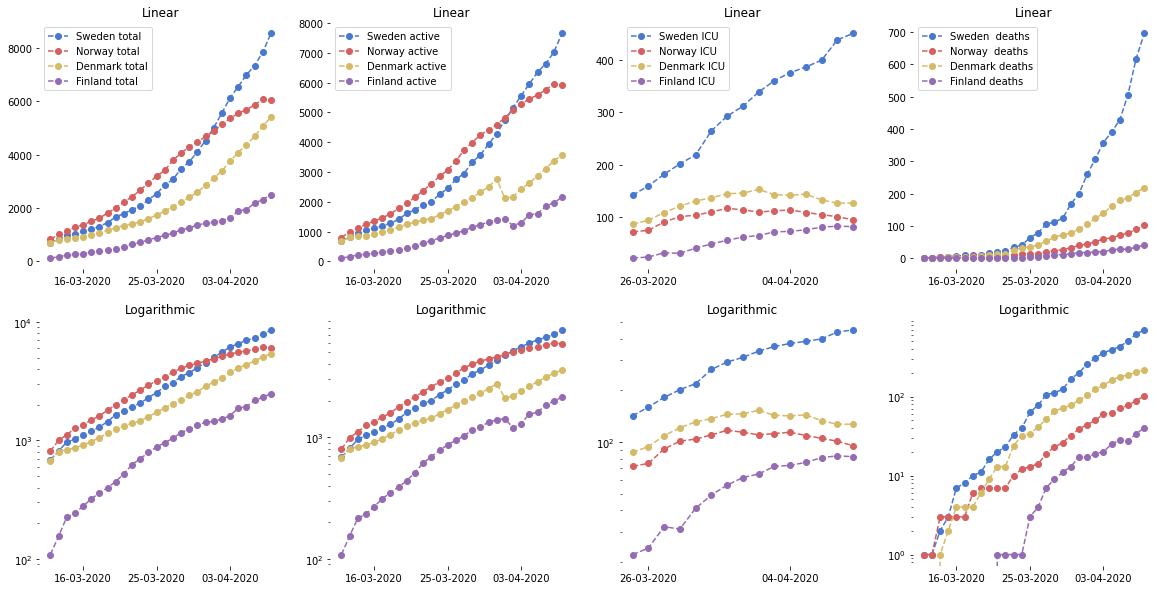

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

# From march 12th
swe_tot = [687, 812, 967, 1032, 1121, 1196,
           1295, 1443, 1650, 1784, 1929,
           2059, 2299, 2527, 2855, 3069,
           3460, 3719, 4113, 4527, 5009, 
           5565, 6129, 6557, 6993, 7345,
           7849, 8554]

nor_tot = [811, 1002, 1114, 1265, 1360,
           1485, 1616, 1795, 1998, 2212,
           2419, 2656, 2934, 3180, 3409,
           3783, 4050, 4301, 4464, 4684,
           4876, 5132, 5361, 5550, 5687,
           5865, 6086, 6042]

dan_tot = [674, 804, 836, 864, 914, 977,
           1057, 1151, 1255, 1326, 1395,
           1460, 1591, 1724, 1877, 2046,
           2201, 2395, 2577, 2860, 3107,
           3386, 3757, 4077, 4369, 4681,
           5071, 5402]

fin_tot = [109, 155, 225, 244, 278, 322,
           359, 400, 450, 523, 626, 700,
           792, 880, 958, 1041, 1167, 1240,
           1352, 1418, 1446, 1518, 1615,
           1882, 1927, 2176, 2308, 2487]

# ----------
swe_act = [685, 812, 958, 1036, 1113, 1187, 1276, 
           1412, 1607, 1734, 1897, 2003, 2243, 2448, 
           2747, 2948, 3326, 3574, 3928, 4291, 4735, 
           5157, 5566, 5961, 6350, 6634, 7026, 7653]

nor_act = [798, 994, 1105, 1252, 1344, 
           1467, 1584, 1782, 1951, 2151,
           2372, 2609, 2848, 3064, 3352,
           3745, 3985, 4251, 4401, 4589,
           4820, 5065, 5279, 5456, 5584,
           5757, 5965, 5909]

dan_act = [673, 803, 834, 861, 909, 972,
           1052, 1144, 1245, 1312, 1381,
           1435, 1558, 1689, 1835, 1993,
           2135, 2322, 2499, 2769, 2109,
           2174, 2425, 2633, 2863, 3116,
           3377, 3563]

fin_act = [108, 154, 215, 234, 268, 312,
           349, 390, 440, 512, 615, 689,
           781, 867, 943, 1024, 1148, 1219,
           1329, 1391, 1419, 1199, 1295,
           1557, 1599, 1849, 1974, 2147]

# From march 25th
swe_icu = [142, 160, 182,
           202, 219, 265, 293,
           312, 339, 361, 376,
           387, 400, 439, 451]

nor_icu = [72, 75, 91, 101, 104,
           110, 117, 114, 110, 112,
           114, 109, 105, 101, 95]

dan_icu = [87, 94, 109, 121, 131,
           137, 145, 146, 153, 143,
           142, 144, 133, 127, 127]

fin_icu = [22, 24, 32, 31, 41, 49,
           56, 62, 65, 72, 73, 76,
           81, 83, 82]

# From march 12th
swe_d = [1, 1, 2, 3, 7, 8, 10, 11, 16,
         20, 23, 33, 40, 63, 78, 105,
         112, 123, 167, 199, 259,
         307, 358, 391, 428, 506, 618,
         696]

nor_d = [1, 1, 3, 3, 3, 3,
         6, 7, 7, 7, 7, 10,
         12, 13, 14, 19, 23,
         26, 32, 39, 44, 50,
         60, 62, 71, 77, 89,
         101]

dan_d = [0, 0, 1, 2, 4, 4, 4,
         6, 9, 13, 13, 24, 32, 34,
         41, 52, 65, 72, 77, 90,
         104, 123, 139, 161, 179,
         187, 203, 218]

fin_d = [0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 3, 4, 7, 9, 11,
         13, 17, 17, 19, 20, 25, 28,
         27, 34, 40]

start = dt.date(2020, 3, 12)
end = start + dt.timedelta(days=len(swe_tot))
days_12 = mdates.drange(start, end, dt.timedelta(days=1))

start = dt.date(2020, 3, 25)
end = start + dt.timedelta(days=len(swe_icu))
days_25 = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(241)
ax1.plot(days_12, swe_tot, '--bo', label='Sweden total')
ax1.plot(days_12, nor_tot, '--ro', label='Norway total')
ax1.plot(days_12, dan_tot, '--yo', label='Denmark total')
ax1.plot(days_12, fin_tot, '--mo', label='Finland total')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=9))

ax2 = fig.add_subplot(245)
ax2.plot(days_12, swe_tot, '--bo')
ax2.plot(days_12, nor_tot, '--ro')
ax2.plot(days_12, dan_tot, '--yo')
ax2.plot(days_12, fin_tot, '--mo')
ax2.set_title('Logarithmic')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=9))
ax2.set_yscale('log')

ax3 = fig.add_subplot(242)
ax3.plot(days_12, swe_act, '--bo', label='Sweden active')
ax3.plot(days_12, nor_act, '--ro', label='Norway active')
ax3.plot(days_12, dan_act, '--yo', label='Denmark active')
ax3.plot(days_12, fin_act, '--mo', label='Finland active')
ax3.legend(loc="upper left")
ax3.set_title('Linear')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=9))

ax4 = fig.add_subplot(246)
ax4.plot(days_12, swe_act, '--bo')
ax4.plot(days_12, nor_act, '--ro')
ax4.plot(days_12, dan_act, '--yo')
ax4.plot(days_12, fin_act, '--mo')
ax4.set_title('Logarithmic')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=9))
ax4.set_yscale('log')

ax5 = fig.add_subplot(243)
ax5.plot(days_25, swe_icu, '--bo', label='Sweden ICU')
ax5.plot(days_25, nor_icu, '--ro', label='Norway ICU')
ax5.plot(days_25, dan_icu, '--yo', label='Denmark ICU')
ax5.plot(days_25, fin_icu, '--mo', label='Finland ICU')
ax5.legend(loc="upper left")
ax5.set_title('Linear')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax5.xaxis.set_major_locator(mdates.DayLocator(interval=9))

ax6 = fig.add_subplot(247)
ax6.plot(days_25, swe_icu, '--bo')
ax6.plot(days_25, nor_icu, '--ro')
ax6.plot(days_25, dan_icu, '--yo')
ax6.plot(days_25, fin_icu, '--mo')
ax6.set_title('Logarithmic')
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax6.xaxis.set_major_locator(mdates.DayLocator(interval=9))
ax6.set_yscale('log')

ax7 = fig.add_subplot(244)
ax7.plot(days_12, swe_d, '--bo', label='Sweden  deaths')
ax7.plot(days_12, nor_d, '--ro', label='Norway  deaths')
ax7.plot(days_12, dan_d, '--yo', label='Denmark deaths')
ax7.plot(days_12, fin_d, '--mo', label='Finland deaths')
ax7.legend(loc="upper left")
ax7.set_title('Linear')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax7.xaxis.set_major_locator(mdates.DayLocator(interval=9))

ax8 = fig.add_subplot(248)
ax8.plot(days_12, swe_d, '--bo')
ax8.plot(days_12, nor_d, '--ro')
ax8.plot(days_12, dan_d, '--yo')
ax8.plot(days_12, fin_d, '--mo')
ax8.set_title('Logarithmic')
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval=9))
ax8.set_yscale('log')

sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

Below is the daily trend for active cases and deaths. The daily decrease in active cases for April 1 in Denmark (-660 cases) and for April 2 in Finland (-220 cases), probably due to a backlog report of recoveries, has been set to 0 to make the graphs more readable.  

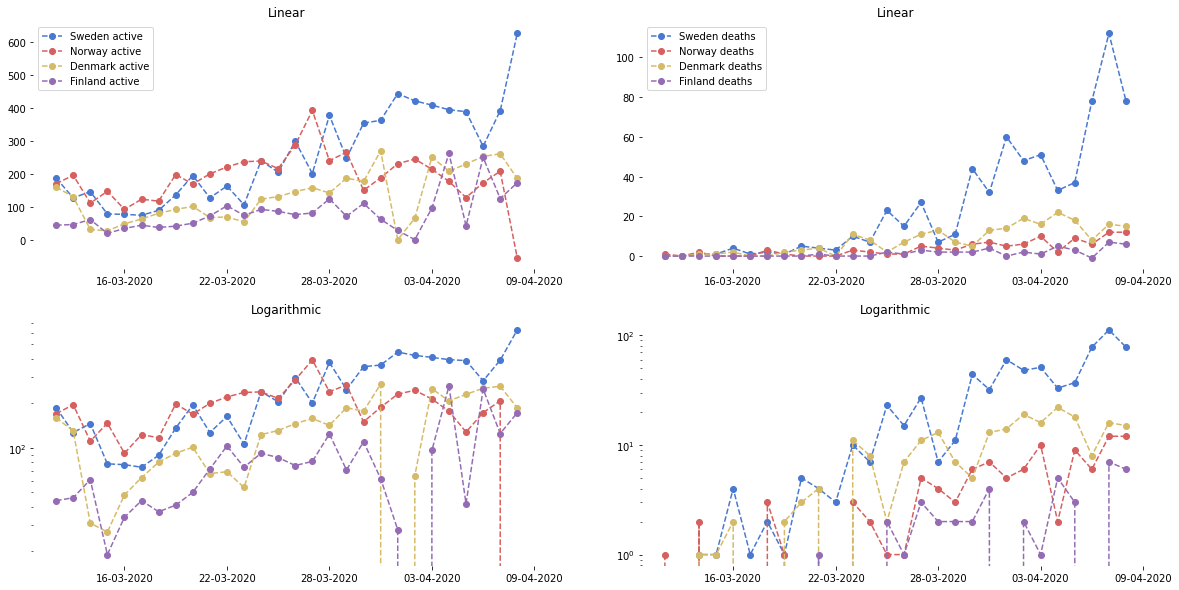

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

swe_act_d = [187]

nor_act_d = [170]

dan_act_d = [160]

fin_act_d = [44]

#---------------
swe_d_d = [0]

nor_d_d = [1]

dan_d_d = [0]

fin_d_d = [0]

for i in range(1, len(swe_act)):
  swe_act_d.append(swe_act[i] - swe_act[i - 1])
  nor_act_d.append(nor_act[i] - nor_act[i - 1])
  dan_act_d.append(dan_act[i] - dan_act[i - 1])
  fin_act_d.append(fin_act[i] - fin_act[i - 1])

for i in range(1, len(swe_d)):
  swe_d_d.append(swe_d[i] - swe_d[i - 1])
  nor_d_d.append(nor_d[i] - nor_d[i - 1])
  dan_d_d.append(dan_d[i] - dan_d[i - 1])
  fin_d_d.append(fin_d[i] - fin_d[i - 1])

dan_act_d[20] = 0
fin_act_d[21] = 0

start = dt.date(2020, 3, 12)
end = start + dt.timedelta(days=len(swe_tot))
days_12 = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(days_12, swe_act_d, '--bo', label='Sweden active')
ax1.plot(days_12, nor_act_d, '--ro', label='Norway active')
ax1.plot(days_12, dan_act_d, '--yo', label='Denmark active')
ax1.plot(days_12, fin_act_d, '--mo', label='Finland active')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=6))

ax2 = fig.add_subplot(223)
ax2.plot(days_12, swe_act_d, '--bo')
ax2.plot(days_12, nor_act_d, '--ro')
ax2.plot(days_12, dan_act_d, '--yo')
ax2.plot(days_12, fin_act_d, '--mo')
ax2.set_title('Logarithmic')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax2.set_yscale('log')

ax3 = fig.add_subplot(222)
ax3.plot(days_12, swe_d_d, '--bo', label='Sweden deaths')
ax3.plot(days_12, nor_d_d, '--ro', label='Norway deaths')
ax3.plot(days_12, dan_d_d, '--yo', label='Denmark deaths')
ax3.plot(days_12, fin_d_d, '--mo', label='Finland deaths')
ax3.legend(loc="upper left")
ax3.set_title('Linear')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=6))

ax4 = fig.add_subplot(224)
ax4.plot(days_12, swe_d_d, '--bo')
ax4.plot(days_12, nor_d_d, '--ro')
ax4.plot(days_12, dan_d_d, '--yo')
ax4.plot(days_12, fin_d_d, '--mo')
ax4.set_title('Logarithmic')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax4.set_yscale('log')

sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

We then plot a bar chart of the active cases and deaths per 100 000 (last updated: April 8).

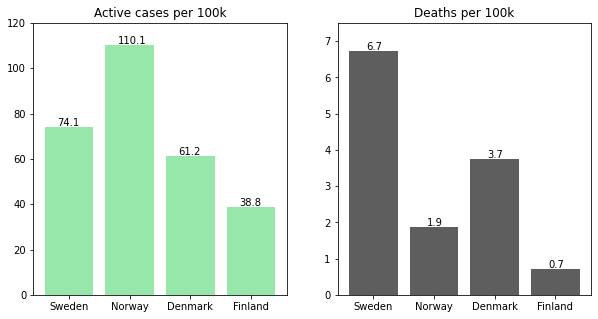

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

swe_pop = 10333456
nor_pop = 5367580
dan_pop = 5822763
fin_pop = 5526774

actives = {}
actives['Sweden'] = (swe_act[len(swe_act) - 1] / swe_pop) * 100000
actives['Norway'] = (nor_act[len(nor_act) - 1] / nor_pop) * 100000
actives['Denmark'] = (dan_act[len(dan_act) - 1] / dan_pop) * 100000
actives['Finland'] = (fin_act[len(fin_act) - 1] / fin_pop) * 100000

deaths = {}
deaths['Sweden'] = (swe_d[len(swe_d) - 1] / swe_pop) * 100000
deaths['Norway'] = (nor_d[len(nor_d) - 1] / nor_pop) * 100000
deaths['Denmark'] = (dan_d[len(dan_d) - 1] / dan_pop) * 100000
deaths['Finland'] = (fin_d[len(fin_d) - 1] / fin_pop) * 100000

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.bar(actives.keys(), actives.values(), color='g', alpha=0.9)
ax1.set_title('Active cases per 100k')
for i, v in enumerate(actives.values()):
    ax1.text(i - 0.2, v + 0.65, '{:.1f}'.format(v),  color='black')
ax1.set_ylim(0, 120)
ax2 = fig.add_subplot(122)
ax2.bar(deaths.keys(), deaths.values(), color='k', alpha=0.7)
ax2.set_title('Deaths per 100k')
for i, v in enumerate(deaths.values()):
    ax2.text(i - 0.12, v + 0.03, '{:.1f}'.format(v),  color='black')
ax2.set_ylim(0, 7.5)
sns.set_color_codes('pastel')
fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()


